In [ ]:
"""ДЗ 1. Блок 1. Введение в теорию вероятностей. 0.1 курс на Stepik. Метод МонтеКарло."""

In [ ]:
# pylint: disable=unused-import

# импортируем необходимые библиотеки
import itertools
import math

# доп import чтоб линтеры проходили
from typing import List, Optional, Tuple, Union

import matplotlib.pyplot as plt

# Эксперименты
# теперь с помощью модуля random
import numpy as np
import pandas as pd

# с помощью библиотеки scipy
from scipy.stats import binom

# импортируем данные о пациентах с диабетом
from sklearn.datasets import load_diabetes

# объявим функцию, которая принимает признаки X и целевую переменную y в формате
# массива Numpy или датафрейма
# дополнительно пропишем размер тестовой выборки с параметром по умолчанию 0,3
# и возможностью задать точку отсчета

1. Комбинаторика в Питоне

np.random.shuffle() и np.random.permutation()

In [12]:
# создадим массив и передадим его в функцию np.random.shuffle()
arr = np.array([1, 2, 3, 4, 5])

# сама функция выдала None, исходный массив при этом изменился
print(np.random.shuffle(arr), arr)

None [3 4 2 1 5]


In [17]:
# еще раз создадим массив
arr = np.array([1, 2, 3, 4, 5])

# передав его в np.random.permutation(),
# мы получим перемешанную копию и исходный массив без изменений
# np.random.permutation(arr), arr
print(f"{np.random.permutation(arr)}, {arr}")

[3 4 2 1 5], [1 2 3 4 5]


In [ ]:
# pylint: disable=unsubscriptable-object


def split_data(
    x_in: Union[np.ndarray[Tuple[int, ...], np.dtype[np.float64]], pd.DataFrame],
    y_in: Union[np.ndarray[Tuple[int, ...], np.dtype[np.float64]], pd.DataFrame],
    test_size: float = 0.3,
    random_state: Optional[int] = None,
) -> Tuple[
    pd.DataFrame,
    pd.DataFrame,
    pd.DataFrame,
    pd.DataFrame,
]:
    """
    Split data into train and test subsets.

    Assume x, y have the same sample num
    """
    # проверим, является ли X массивом Numpy с помощью функции isinstance()
    if isinstance(x_in, np.ndarray):
        # если да, превратим в датафрейм
        x_in = pd.DataFrame(x_in)
    # сделаем то же самое для y
    if isinstance(y_in, np.ndarray):
        y_in = pd.DataFrame(y_in)

    # еще один способ выполнить такую проверку
    # if type(X). __module__ == np. __name__:
    #   X = pd.DataFrame(X)
    # if type(y). __module__ == np. __name__:
    #   y = pd.DataFrame(y)

    # установим точку отсчета
    np.random.seed(random_state)

    # перемешаем индексы строк датасета X, не изменяя исходный массив
    indices = np.random.permutation(len(x_in))

    # определим количество строк, которые войдут в тестовую выборку
    # для этого умножим количество строк в X на долю тестовой выборки
    data_test_size = int(x_in.shape[0] * test_size)

    # начиная с этого количества (границы), будет обучающая выборка
    train_indices = indices[data_test_size:]
    # перед ним, тестовая
    test_indices = indices[:data_test_size]

    # с помощью метода .iloc() найдем в X все строки,
    # соответствующие индексам в переменных train_indices и test_indices
    x_train_out = x_in.iloc[train_indices]
    x_test_out = x_in.iloc[test_indices]

    # сделаем то же самое для y
    y_train_out = y_in.iloc[train_indices]
    y_test_out = y_in.iloc[test_indices]

    # выведем выборки в том порядке, в котором они выводятся в sklearn
    return x_train_out, x_test_out, y_train_out, y_test_out

In [8]:
# помещаем их в переменную data
data = load_diabetes()

# создаем два датафрейма
x_data = pd.DataFrame(data.data, columns=data.feature_names)
y_data = pd.DataFrame(data.target, columns=["target"])

# для проверки работы функции можно также создать массивы Numpy
# X = data.data
# y = data.target

In [9]:
# вызовем функцию split_data()
x_train, x_test, y_train, y_test = split_data(x_data, y_data, random_state=42)

In [10]:
# посмотрим на индексы строк в переменной X_train
x_train.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
108,0.019913,0.050680,0.045529,0.029894,-0.062111,-0.055802,-0.072854,0.026929,0.045604,0.040343
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907


In [11]:
# теперь посмотрим на y_train
y_train.head(3)

,target
108,232.0
225,208.0
412,261.0


2. Модуль itertools

Перестановки

Перестановки без замены

Перестановки без повторений

In [13]:
# передадим функции factorial() число 3
math.factorial(3)

6

In [ ]:
# создадим строку из букв A, B, C
x_data_it = "ABC"
# помимо строки можно использовать и список
# x = ['A', 'B', 'C']

# и передадим ее в функцию permutations()
# так как функция возвращает объект itertools.permutations,
# для вывода результата используем функцию list()
list(itertools.permutations(x_data_it))

[('A', 'B', 'C'),
 ('A', 'C', 'B'),
 ('B', 'A', 'C'),
 ('B', 'C', 'A'),
 ('C', 'A', 'B'),
 ('C', 'B', 'A')]

In [ ]:
# чтобы узнать количество перестановок, можно использовать функцию len()
len(list(itertools.permutations(x_data_it)))

In [20]:
# теперь элементов исходного множества шесть
x_data_it = "ABCDEF"

# чтобы узнать, сколькими способами их можно разместить на трех местах,
# передадим параметр r = 3 и выведем первые пять элементов
print(list(itertools.permutations(x_data_it, r=3))[:5])

[('A', 'B', 'C'), ('A', 'B', 'D'), ('A', 'B', 'E'), ('A', 'B', 'F'), ('A', 'C', 'B')]


In [ ]:
# посмотрим на общее количество таких перестановок
len(list(itertools.permutations(x_data_it, r=3)))

120

2.2 Перестановки с повторениями

In [ ]:
# pylint: disable=unsubscriptable-object


# объявим функцию permutations_w_repetition(), которая будет принимать два параметра
# x - строка, список или массив Numpy
# r - количество мест в перестановке, по умолчанию равно количеству элементов в x


def permutations_w_repetition(
    x_in: Union[str, List[str], np.ndarray[Tuple[int, ...], np.dtype[np.int64]]],
    # r: int = len(x_in),
    r_in: int,
) -> int:
    """
    Перестановки с повторением.

    принимать два параметра
    # x - строка, список или массив Numpy
    # r - количество мест в перестановке, по умолчанию равно количеству элементов в x
    """
    # если передается строка,
    if isinstance(x_in, str):
        # превращаем ее в список
        x_in = list(x_in)

    # в числителе рассчитаем количество перестановок без повторений
    numerator = len(list(itertools.permutations(x_in, r=r_in)))

    # для того чтобы рассчитать знаменатель найдем,
    # сколько раз повторяется каждый из элементов
    _, counts = np.unique(x_in, return_counts=True)

    # объявим переменную для знаменателя
    denominator = 1

    # и в цикле будем помещать туда произведение факториалов
    # повторяющихся элементов
    for c_it in counts:

        # для этого проверим повторяется ли элемент
        if c_it > 1:

            # и если да, умножим знаменатель на факториал повторяющегося элемента
            denominator *= math.factorial(c_it)

    # разделим числитель на знаменатель
    # деление дает тип float, поэтому используем функцию int(),
    # чтобы результат был целым числом
    return int(numerator / denominator)

In [29]:
# создадим строку со словом "молоко"
x_data_it = "МОЛОКО"

# вызовем функцию
# permutations_w_repetition(x)
permutations_w_repetition(x_data_it, len(x_data_it))

120

2.3 Перестановки с заменой

In [ ]:
# посмотрим, сколькими способами можно выбрать два сорта мороженого
list(itertools.product(["Ваниль", "Клубника"], repeat=2))

In [ ]:
# посмотрим на способы переставить с заменой два элемента из четырех
list(itertools.product("ABCD", repeat=2))

In [33]:
# убедимся, что таких способов 16
len(list(itertools.product("ABCD", repeat=2)))

16

2.4 Сочетания

In [34]:
# возьмем пять элементов
x_data_it = "ABCDE"

# и найдем способ переставить два элемента из этих пяти
list(itertools.permutations(x_data_it, r=2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'A'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'E'),
 ('E', 'A'),
 ('E', 'B'),
 ('E', 'C'),
 ('E', 'D')]

In [35]:
# уменьшим на количество перестановок каждого типа r!
int(len(list(itertools.permutations(x_data_it, r=2))) / math.factorial(2))

10

In [37]:
# то же самое можно рассчитать с помощью функции combinations()
list(itertools.combinations(x_data_it, 2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'E')]

In [39]:
# посмотрим на количество сочетаний
len(list(itertools.combinations(x_data_it, 2)))

10

2.5 Сочетания с заменой

In [40]:
# сколькими способами с заменой можно выбрать два элемента из двух
list(itertools.combinations_with_replacement("AB", 2))

[('A', 'A'), ('A', 'B'), ('B', 'B')]

In [41]:
# очевидно, что без замены есть только один такой способ
list(itertools.combinations("AB", 2))

[('A', 'B')]

3. Биномиальные коэффициенты

In [42]:
# дерево вероятностей можно построить с помощью декартовой степени
list(itertools.product("HT", repeat=3))

[('H', 'H', 'H'),
 ('H', 'H', 'T'),
 ('H', 'T', 'H'),
 ('H', 'T', 'T'),
 ('T', 'H', 'H'),
 ('T', 'H', 'T'),
 ('T', 'T', 'H'),
 ('T', 'T', 'T')]

In [43]:
# посмотрим, в скольких комбинациях выпадет две решки при трех бросках
comb = len(list(itertools.combinations("ABC", 2)))
comb

3

In [ ]:
# то же самое можно вычислить через функцию вероятности (probability mass function, pmf)
# биномиального распределения библиотеки scipy
binom.pmf(k=2, n=3, p=0.7).round(3)

0.441

In [44]:
# вычислим вероятность выпадения двух орлов в трех бросках
# при вероятности выпадения орла 0,7
round(comb * (0.7**2 * (1 - 0.7) ** (3 - 2)), 3)

0.441

4. Дополнительные примеры

Матожидание и среднее значение

Математическое ожидание

In [47]:
# для биномиального распределения со следующими параметрами
n_par, p_par = 3, 0.7

# рассчитаем матожидание и ожидаемую дисперсию
expected_value, variance = binom.stats(n_par, p_par, moments="mv")
expected_value, variance

(2.0999999999999996, 0.6299999999999999)

Фактическое среднее значение

In [51]:
# проведем миллион биномиальных экспрериментов
res = np.random.binomial(n=3, p=0.7, size=1000000)

# и посмотрим на фактическое среднее значение и фактическую дисперсию
# np.mean(res), np.var(res)
print(f"{np.mean(res)} {np.var(res)}")

2.100058 0.6305083966359999


5. Эксперименты

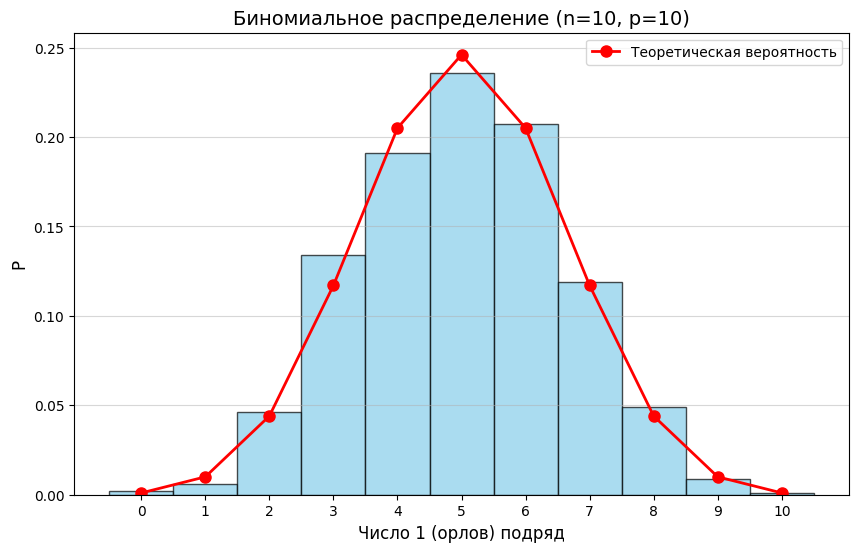

In [ ]:
n_param = 10  # количество испытаний (бросаний монетки)
p_param = 0.5  # вероятность успеха (орла)

# Генерируем выборку из биномиального распределения
sample_size = 1000  # количество экспериментов
data = np.random.binomial(n_param, p_param, sample_size)

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.hist(
    data,
    bins=np.arange(-0.5, n_param + 1.5, 1),
    density=True,
    alpha=0.7,
    color="skyblue",
    edgecolor="black",
)

# график
plt.title(f"Биномиальное распределение (n={n_param}, p={n_param})", fontsize=14)
plt.xlabel("Число 1 (орлов) подряд", fontsize=12)
plt.ylabel("P", fontsize=12)
plt.xticks(range(n_param + 1))
plt.grid(axis="y", alpha=0.5)


# то же самое можно вычислить через функцию вероятности (probability mass function, pmf)
# биномиального распределения библиотеки scipy
# Теоретическое распределение для сравнения
x_data_2 = np.arange(0, n_param + 1)
# pmf = [np.math.comb(n, k) * (p**k) * ((1-p)**(n-k)) for k in x]
pmf = [binom.pmf(k=k, n=n_param, p=0.5).round(3) for k in x_data_2]
plt.plot(
    x_data_2, pmf, "ro-", linewidth=2, markersize=8, label="Теоретическая вероятность"
)

plt.legend()
plt.show()